# Introduction

The main theme is the modeling of glacier dynamics. It explores how changes in snowfall and surface altitude affect glacier stability. Kinematic wave theory is used to study how glaciers respond to sudden changes in accumulation, focusing on their sensitivity to climate changes.
It is important to understand glacier behavior as it helps predict ice loss, sea-level rise, and climate change impacts. This instability is important for modeling how glaciers respond to climate change.

STILL NEED: What observations, models, etc are used by others that are different from what you are doing in the project.

# Equations

The equation that we are looking to solve is the kinematic wave equation which is given by:
$$\frac{\partial q}{\partial x} + \frac{1}{c} \frac{\partial q}{\partial t} = a(x,t)$$

Where $q$ is the flow, or the volume of ice, per unit width, that is passing a single point in time, $a(x,t)$ is the rate of accumulation at the surface of the glacier, and $c$ is the the velocity of the 'wave' moving through the glacier.

This equation was derived from this equation: $\frac{\partial q}{\partial x} + \frac{\partial h}{\partial t} = a$; where $h$ is the thickness of ice.

# Numerical Methods

We used the Forward Euler upwind scheme to solve our equation. The kinematic equation is a first-order differential equation, and the forward Euler method is the simplest way to this type of equation. 

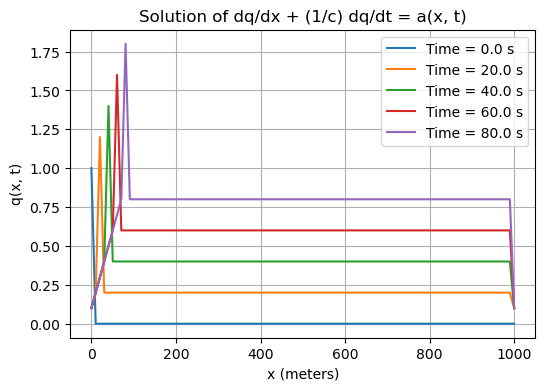

In [28]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

L = 1000  # Glacier length (meters)
T = 100  # Total simulation time (seconds)
dx = 10  # Spatial step (meters)
dt = 10  # Time step (seconds)
c = 1   # wave velocity

nx = int(L / dx)  
nt = int(T / dt)

x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# Accumulation
def a(x, t):
    return .01
# Initial and boundary conditions
q = np.zeros((nt, nx))
q[0, :] = np.exp(-x)  # Initial condition

# Advection matrix
Cr = c * dt / dx 
data = np.array([Cr * np.ones(nx), (1 - Cr) * np.ones(nx)])
diags = np.array([-1, 0])
M = spdiags(data, diags, nx, nx).toarray()

# Boundary conditions
M[0, 0] = 0  # Left boundary condition
M[-1, -1] = 0  # Right boundary condition
M[-1, -2] = 0  # Right boundary condition (no flux)

#loop
for n in range(1, nt):
    C = q[n-1, :]
    Cnew = np.matmul(M, C)

    Cnew += dt * a(x, t[n])

    q[n, :] = Cnew

# Plot
plt.figure(figsize=(6, 4))
for n in range(0, nt, nt // 5):
    plt.plot(x, q[n, :], label=f'Time = {n * dt:.1f} s')

plt.xlabel('x (meters)')
plt.ylabel('q(x, t)')
plt.title('Solution of dq/dx + (1/c) dq/dt = a(x, t)')
plt.legend()
plt.grid()
plt.show()

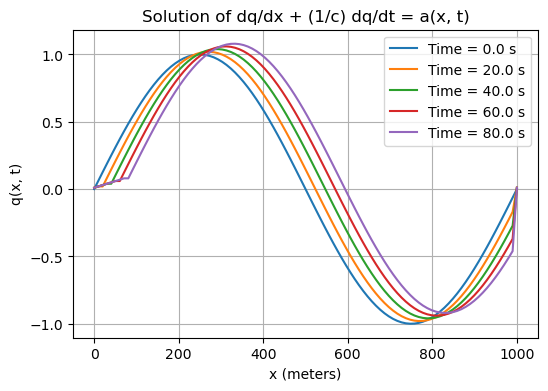

In [22]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

L = 1000  # Glacier length (meters)
T = 100  # Total simulation time (seconds)
dx = 10  # Spatial step (meters)
dt = 10  # Time step (seconds)
c = 1   # wave velocity

nx = int(L / dx)  
nt = int(T / dt)

x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)

# Accumulation
def a(x, t):
    return .001
# Initial and boundary conditions
q = np.zeros((nt, nx))
q[0, :] = np.sin(2 * np.pi * x / L)  # Initial condition

# Advection matrix
Cr = c * dt / dx   
data = np.array([Cr * np.ones(nx), (1 - Cr) * np.ones(nx)])
diags = np.array([-1, 0])
M = spdiags(data, diags, nx, nx).toarray()

# Boundary conditions
M[0, 0] = 0  # Left boundary condition
M[-1, -1] = 0  # Right boundary condition
M[-1, -2] = 0  # Right boundary condition (no flux)

#loop
for n in range(1, nt):
    C = q[n-1, :]
    Cnew = np.matmul(M, C)

    Cnew += dt * a(x, t[n])

    q[n, :] = Cnew

# Plot
plt.figure(figsize=(6, 4))
for n in range(0, nt, nt // 5):
    plt.plot(x, q[n, :], label=f'Time = {n * dt:.1f} s')

plt.xlabel('x (meters)')
plt.ylabel('q(x, t)')
plt.title('Solution of dq/dx + (1/c) dq/dt = a(x, t)')
plt.legend()
plt.grid()
plt.show()

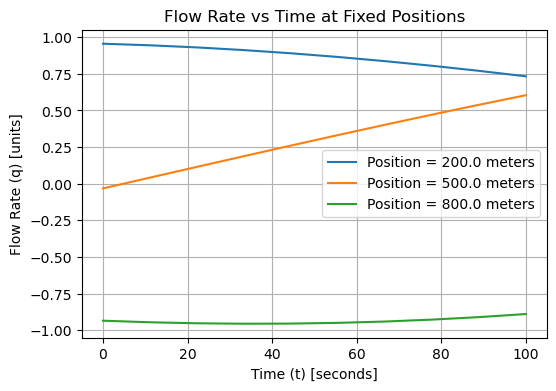

In [2]:
plt.figure(figsize=(6, 4))
for x in [0.2, 0.5, 0.8]:
    space_index = int(x * nx)
    plt.plot(t, q[:, space_index], label=f"Position = {x * L:.1f} meters")

plt.title("Flow Rate vs Time at Fixed Positions")
plt.xlabel("Time (t) [seconds]")
plt.ylabel("Flow Rate (q) [units]")
plt.legend()
plt.grid()
plt.show()

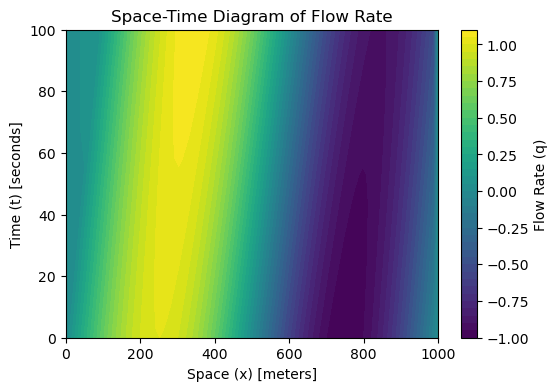

In [3]:
plt.figure(figsize=(6, 4))
X, T_grid = np.meshgrid(np.linspace(0, L, nx), np.linspace(0, T, nt))
plt.contourf(X, T_grid, q, levels=50, cmap="viridis")
plt.colorbar(label="Flow Rate (q)")
plt.title("Space-Time Diagram of Flow Rate")
plt.xlabel("Space (x) [meters]")
plt.ylabel("Time (t) [seconds]")
plt.show()

# Results

What simulations did you run with the model?

We simulated flow rate variations with respect to time, space, and both. We also explored how initial flow conditions affect spatial changes. 

Describe the results.


How do the results compare with any known solutions, or data?


How do the results change with different methods, time steps, grid spacing, or model parameters?


What did the model tell you about the process you were studying?


How could the model be improved in terms of methods used or processes included?

# Video walkthrough

# References